<a href="https://colab.research.google.com/github/qweliant/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
def sqrt(val):
  return (val ** (1/2))
  pass


def variance(set):
  sum = 0
  for x in set:
    sum = sum + x
  
  mean = sum/len(set)
  print("Mean:",mean)
  
  var = [x - mean for x in set]
  # print(var)
  
  var_set = [x ** 2 for x in var]
  # print(var_set)
  
  vari = 0;
  for x in var_set:
    vari = vari + x
    
  varys_by = vari /len(var_set)
  print("Variance:",varys_by)
  return varys_by
  pass

def stdev(val):
  #   print(sqrt(variance(val)))
  return sqrt(variance(val))
  pass


In [2]:

stdev([3505, 2400, 3027, 2798, 3700, 3250, 2689])

Mean: 3052.714285714286
Variance: 183761.06122448976


428.67360686714756

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(np.var([3505, 2400, 3027, 2798, 3700, 3250, 2689]))
print(np.mean([3505, 2400, 3027, 2798, 3700, 3250, 2689]))
print(np.std([3505, 2400, 3027, 2798, 3700, 3250, 2689]))

183761.06122448976
3052.714285714286
428.67360686714756


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

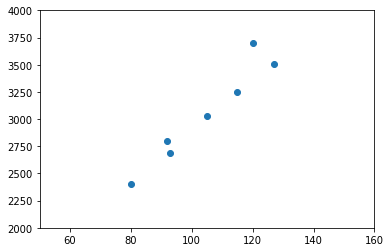

In [4]:
customers = [127, 80, 105, 92, 120, 115, 93]
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]


store_data = { "customers" : customers, "sales" : sales}

df = pd.DataFrame(store_data)

plt.scatter( df.customers, df.sales)
plt.xlim(50,160)
plt.ylim(2000,4000)
plt.show()


In [5]:
print(np.cov(customers, y=sales, bias=False))

[[   290.95238095   7604.35714286]
 [  7604.35714286 214387.9047619 ]]


In [7]:
df.cov()

,customers,sales
customers,290.952381,7604.357143
sales,7604.357143,214387.904762


In [8]:
df.corr()

,customers,sales
customers,1.000000,0.962834
sales,0.962834,1.000000


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient, r, that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [13]:
'''
I am treating and c as x, s as y
'''
c = stdev([127, 80, 105, 92, 120, 115, 93])
s = stdev([3505, 2400, 3027, 2798, 3700, 3250, 2689])



r = df.cov()/(c*s)
r

#this does not look correct, so i should ask about this

Mean: 104.57142857142857
Variance: 249.3877551020408
Mean: 3052.714285714286
Variance: 183761.06122448976


,x,y
x,0.001020,0.000746
y,0.000746,0.001400


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
url = "https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv"
titanic.fillna(method='ffill')
titanic = pd.read_csv(url)
titanic.head()


In [0]:
titanic.embarked.unique()

In [0]:
titanic.sex.unique()

In [0]:
uni = list(titanic.cabin.unique())
uni

In [0]:

nums=[]
for i,x in enumerate(uni):
    nums.append(i)
    #print(i,x)

zipper= dict(zip(uni, nums))
zipper

In [0]:
new_values1 = { 
    "S" : 0,
    "C" : 1,
    "Q" : 2,
    "male" : 0,
    "female" : 1,
    }


In [0]:
encode = new_values1.update(zipper)

In [52]:
titanic.replace(new_values1, inplace=True)
titanic.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",1,29.0000,0.0,0.0,24160,211.3375,0,0,2,6.0,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",0,0.9167,1.0,2.0,113781,151.5500,1,0,11,6.0,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",1,2.0000,1.0,2.0,113781,151.5500,1,0,6,6.0,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",0,30.0000,1.0,2.0,113781,151.5500,1,0,6,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1.0,2.0,113781,151.5500,1,0,6,6.0,"Montreal, PQ / Chesterville, ON",1


In [0]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
new_titanic = titanic.select_dtypes(include=numerics)

In [19]:
new_titanic.head()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
0,1,1.0,1.0,29.0000,0.0,0.0,211.3375,NaN,1
1,2,1.0,1.0,0.9167,1.0,2.0,151.5500,NaN,1
2,3,1.0,0.0,2.0000,1.0,2.0,151.5500,NaN,1
3,4,1.0,0.0,30.0000,1.0,2.0,151.5500,135.0,1
4,5,1.0,0.0,25.0000,1.0,2.0,151.5500,NaN,1


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

Your text here

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



## 6.2 What does it mean to form a basis?

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

## 7.2 What does the rank of a matrix tell us?

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

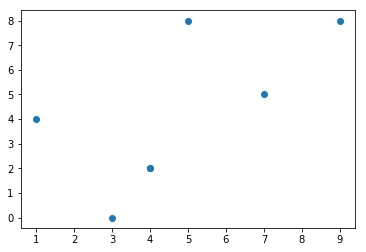

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()